In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('housing.csv')

In [4]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.dropna(inplace=True)

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop(['median_house_value'], axis= 1)
y = df['median_house_value']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
train_data = X_train.join(y_train)

array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

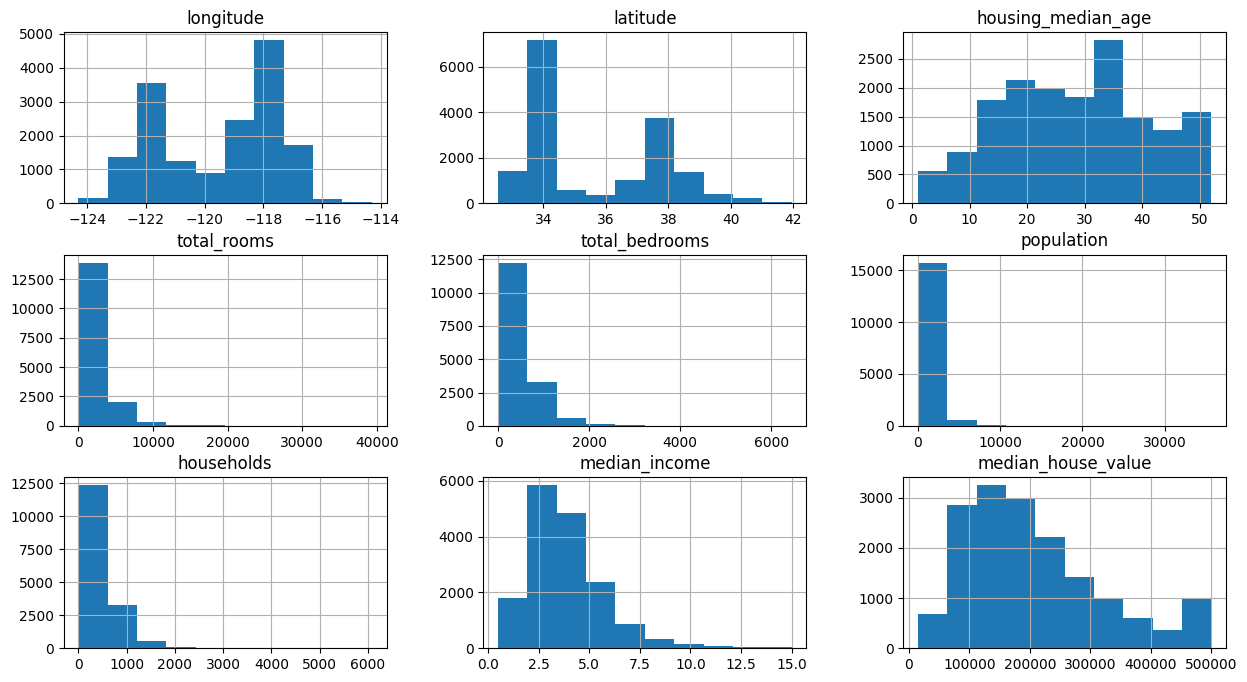

In [10]:
train_data.hist(figsize=(15, 8))

<AxesSubplot: >

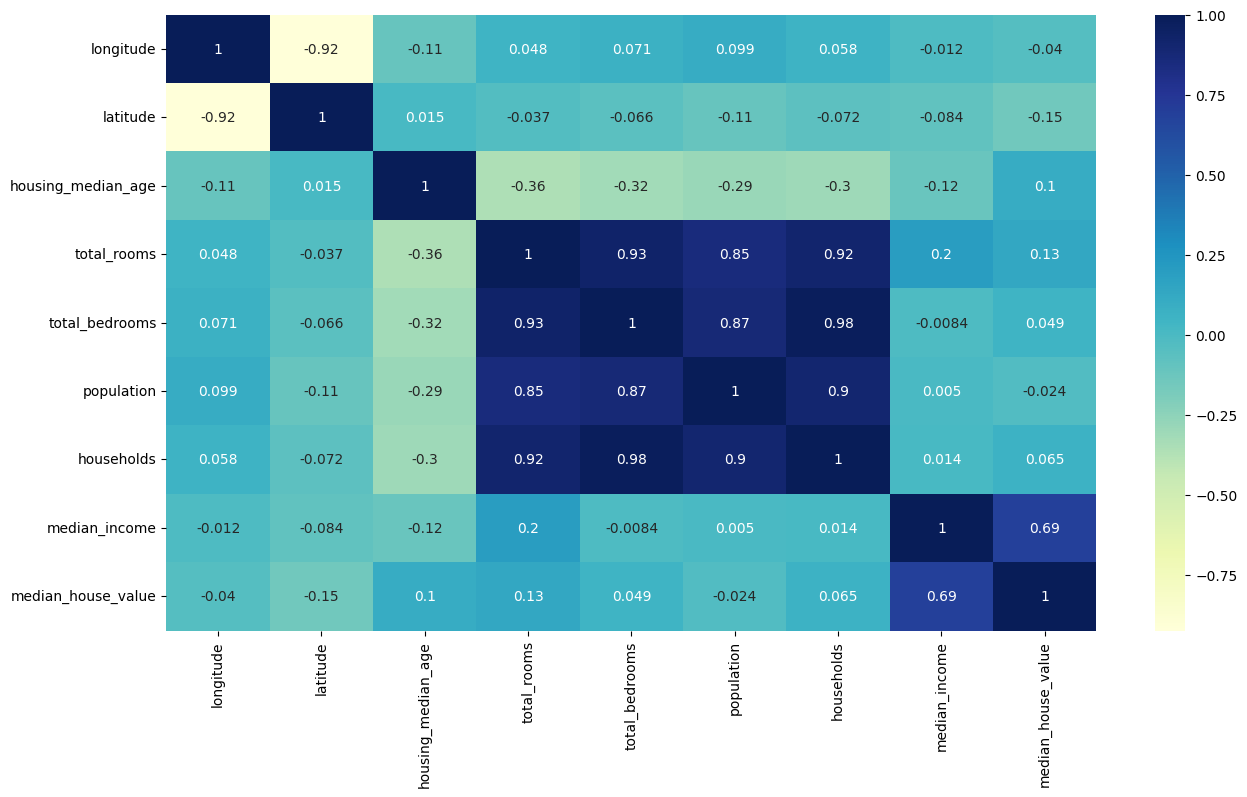

In [11]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap= "YlGnBu")

<h2>Starts data preprocessing

In [12]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

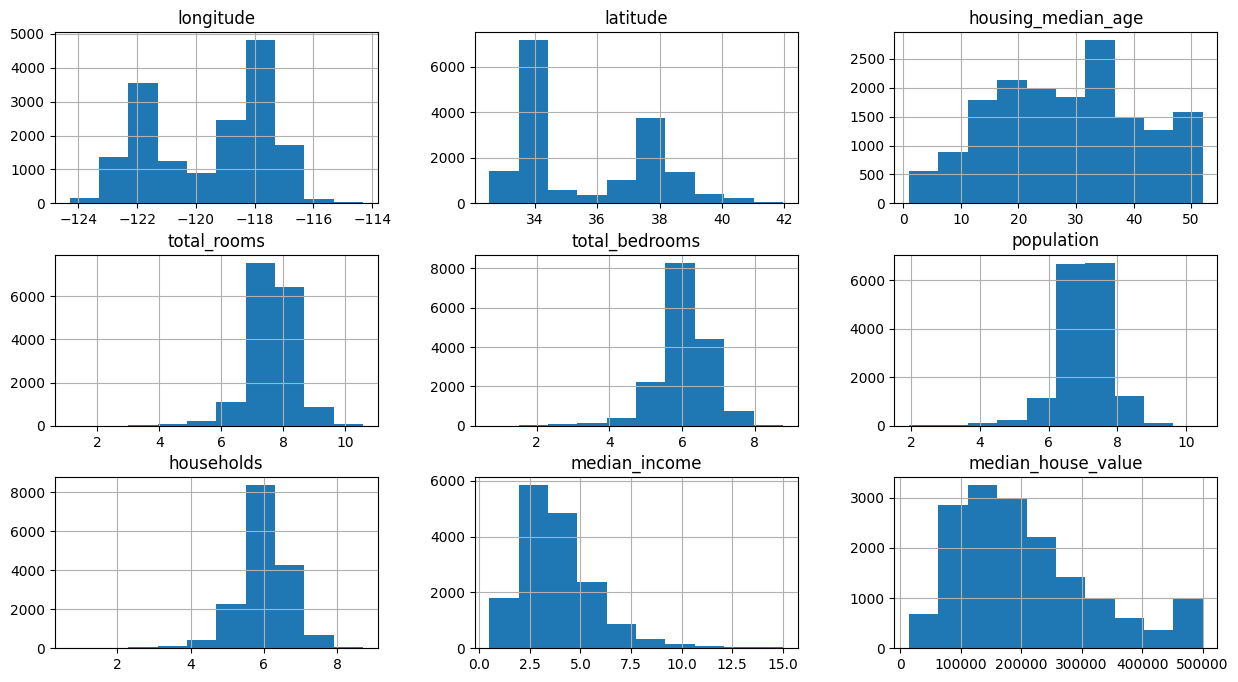

In [13]:
train_data.hist(figsize=(15, 8))

In [14]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [15]:
train_data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
16506    -121.13     37.73                40.0     7.027315        5.398163   
12988    -121.27     38.69                16.0     8.128585        6.393591   
9925     -122.33     38.31                14.0     8.821585        6.854355   
6014     -117.79     34.07                33.0     7.435438        5.811141   
7792     -118.08     33.89                28.0     6.943122        5.620401   
...          ...       ...                 ...          ...             ...   
18161    -122.05     37.36                29.0     7.458186        5.545177   
14379    -117.28     32.74                33.0     8.335431        7.014814   
930      -122.04     37.55                23.0     8.061802        6.278521   
1072     -121.83     39.74                34.0     8.090709        6.405228   
13407    -117.48     34.09                32.0     8.061802        6.447306   

       population  households  median_income  median_house_value  <1H OCEAN  \
16506    6.504288    5.463832         3.3158            125900.0          0   
12988    7.423568    6.343880         4.4489            145600.0          0   
9925     7.926242    6.922644         6.1953            258900.0          0   
6014     7.432484    5.710427         3.7583            116300.0          0   
7792     7.343426    5.598422         3.0357            123400.0          1   
...           ...         ...            ...                 ...        ...   
18161    6.522093    5.631212         7.5337            406800.0          1   
14379    7.487734    6.892642         2.7515            247700.0          0   
930      7.277248    6.246107         4.4357            291700.0          0   
1072     7.163172    6.388561         2.5750            130300.0          0   
13407    7.868254    6.364751         3.6394             99200.0          0   

       INLAND  ISLAND  NEAR BAY  NEAR OCEAN  
16506       1       0         0           0  
12988       1       0         0           0  
9925        0       0         1           0  
6014        1       0         0           0  
7792        0       0         0           0  
...       ...     ...       ...         ...  
18161       0       0         0           0  
14379       0       0         0           1  
930         0       0         1           0  
1072        1       0         0           0  
13407       1       0         0           0  

[16346 rows x 14 columns]

<AxesSubplot: >

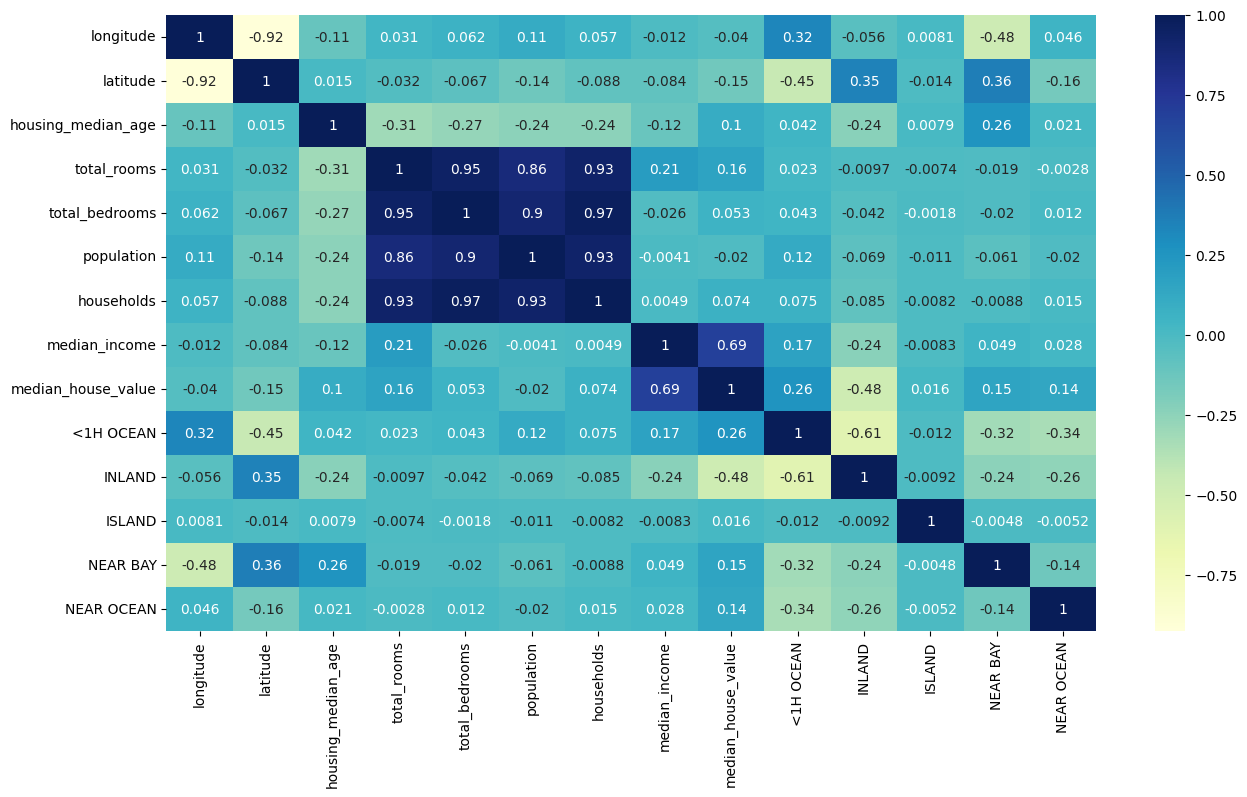

In [16]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap= "YlGnBu")

<AxesSubplot: xlabel='latitude', ylabel='longitude'>

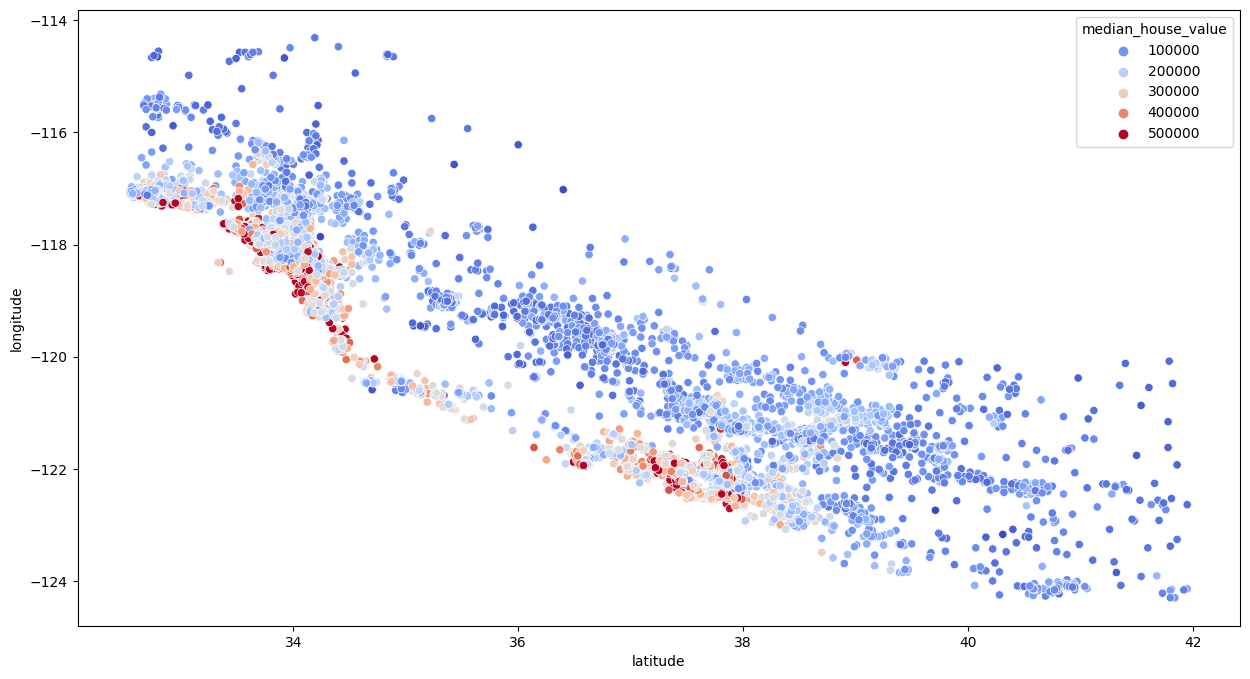

In [17]:
#visualize the map of california with prices near shores
plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

In [18]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<AxesSubplot: >

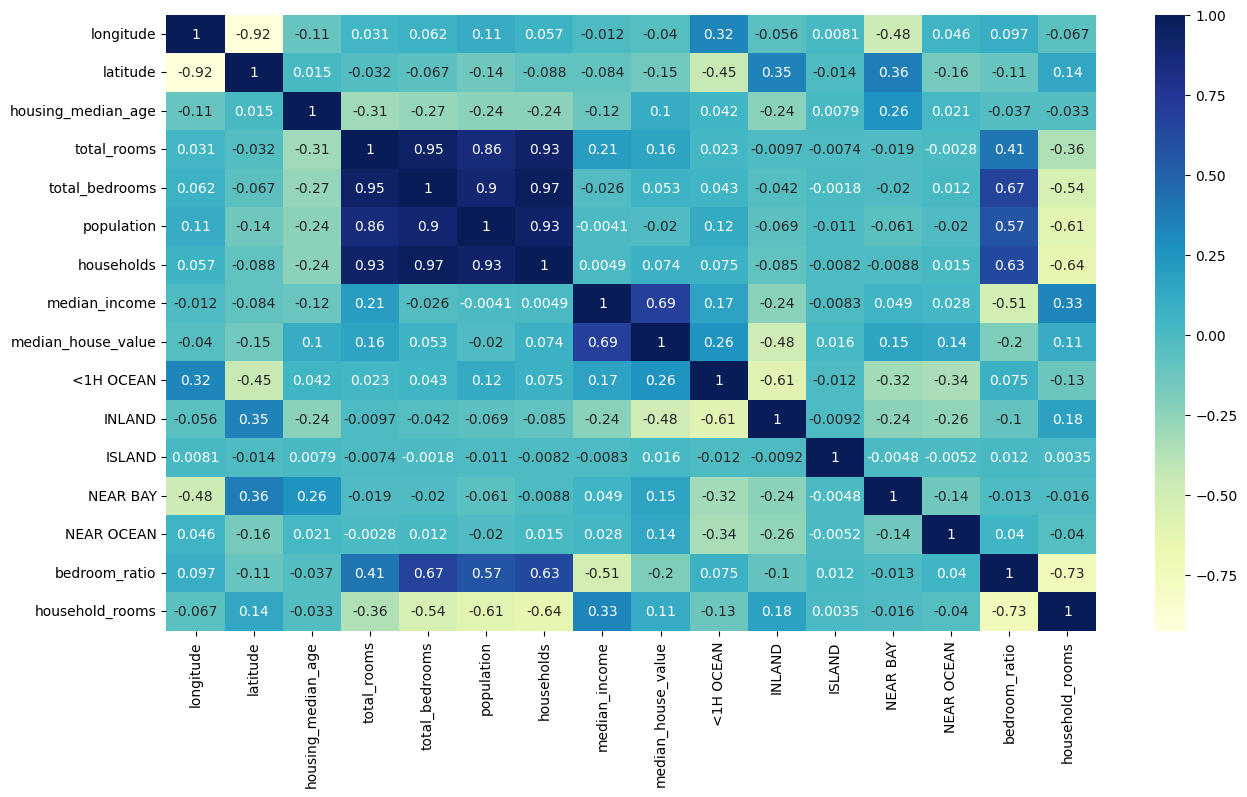

In [19]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap= "YlGnBu")

<h3>Linear regression model

In [29]:
from sklearn.linear_model import LinearRegression

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [30]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [31]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [33]:
reg.score(X_test, y_test)

0.6791320943629302

<h3>Random Forest model

In [35]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [36]:
forest.score(X_test, y_test)

0.8116019805554168

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200, 300],
    "min_sample_split": [2, 4],
    "max_depth": [None, 4 , 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring = "neg_mean_squared_error", return_train_score=True)

grid_search.fit(X_train, y_train)

In [41]:
best_forest = grid_search.best_estimator_

In [42]:
best_forest.score(X_test, y_test)

0.8032179288929107